In [6]:
import os
import pickle
import pandas as pd

In [21]:
PATH = "../out/"
ds_names = ["UCIHAR", "MHEALTH", "PAMAP2"]

In [28]:
summary = []
for name in ds_names:
    path = PATH + name + "/training/"
    for file_name in os.listdir(path):
        if "results" in file_name:
            results = pickle.load(open(path + file_name, 'rb'))
            exp = file_name.split(".")[0].split("_")
            
            graph_method = "_".join(exp[2:5])
            graph_method_desc = "_".join(exp[5:])
            
#             print(exp)
            
            summary.append([
                name,
                exp[1], 
                graph_method,
                graph_method_desc,
                results["balanced_accuracy"],
                results["accuracy"],
                results["f1_score"]
            ])
        

summary = pd.DataFrame(summary)
summary.columns = ["Dataset",
                   "Conv_type", "graph_method", "graph_method_desc",
                   "balanced_accuracy", "accuracy", "f1_score"]
        

In [29]:
sorted_results = summary.sort_values(by=["Dataset", "balanced_accuracy", "Conv_type", "graph_method"], ascending=False)

In [30]:
sorted_results[(sorted_results.Dataset == "PAMAP2") & (sorted_results.Conv_type == "GraphConv")] 

,Dataset,Conv_type,graph_method,graph_method_desc,balanced_accuracy,accuracy,f1_score


In [19]:
def plot_results(dataset, idx):
    data = summary[summary["Dataset"] == dataset].sort_values(by=["balanced_accuracy", "Conv_type"], ascending=False)
    data.loc[:, ["Conv_type", "balanced_accuracy", "f1_score"]].plot(x="Conv_type", figsize=(10,4))
    print(data.index)

Int64Index([], dtype='int64')


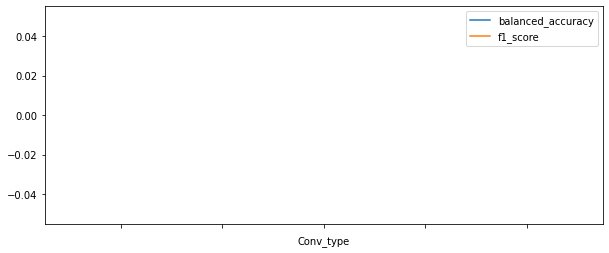

In [20]:
plot_results("UCIHAR", [])

Int64Index([39, 19, 37, 30, 18, 21, 28, 40, 26, 42, 32, 41, 24, 34, 25, 27, 43,
            20, 33, 23, 22, 36, 17, 35, 29, 31, 38],
           dtype='int64')


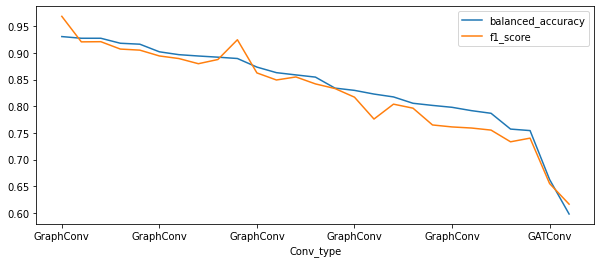

In [25]:
plot_results("MHEALTH", [19,40,33,35,31])

Int64Index([55, 49, 45, 52, 63, 53, 68, 46, 65, 50, 54, 64, 60, 51, 57, 61, 44,
            62, 56, 48, 67, 66, 59, 58, 47],
           dtype='int64')


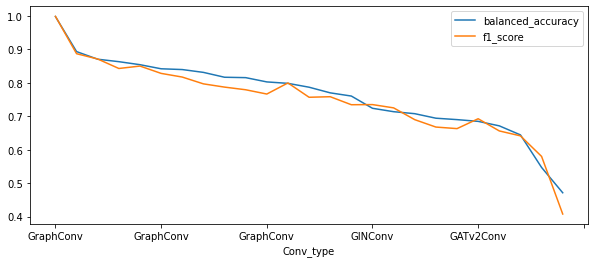

In [26]:
plot_results("PAMAP2", [49, 65, 51, 44, 67, 58])

In [22]:
import itertools
params = [[3], [32, 64, 128], [0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005], [0.5], [False],
          ["add"], ["mean"], [0.5]]
search_grid = list(itertools.product(*params))

In [24]:
search_grid

[(3, 32, 0.01, 0.5, False, 'add', 'mean', 0.5),
 (3, 32, 0.05, 0.5, False, 'add', 'mean', 0.5),
 (3, 32, 0.001, 0.5, False, 'add', 'mean', 0.5),
 (3, 32, 0.005, 0.5, False, 'add', 'mean', 0.5),
 (3, 32, 0.0001, 0.5, False, 'add', 'mean', 0.5),
 (3, 32, 0.0005, 0.5, False, 'add', 'mean', 0.5),
 (3, 64, 0.01, 0.5, False, 'add', 'mean', 0.5),
 (3, 64, 0.05, 0.5, False, 'add', 'mean', 0.5),
 (3, 64, 0.001, 0.5, False, 'add', 'mean', 0.5),
 (3, 64, 0.005, 0.5, False, 'add', 'mean', 0.5),
 (3, 64, 0.0001, 0.5, False, 'add', 'mean', 0.5),
 (3, 64, 0.0005, 0.5, False, 'add', 'mean', 0.5),
 (3, 128, 0.01, 0.5, False, 'add', 'mean', 0.5),
 (3, 128, 0.05, 0.5, False, 'add', 'mean', 0.5),
 (3, 128, 0.001, 0.5, False, 'add', 'mean', 0.5),
 (3, 128, 0.005, 0.5, False, 'add', 'mean', 0.5),
 (3, 128, 0.0001, 0.5, False, 'add', 'mean', 0.5),
 (3, 128, 0.0005, 0.5, False, 'add', 'mean', 0.5)]

In [53]:
n = "1"
print(n.zfill(4))

0001
